In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Convolutional Neural Network
import numpy as np
import matplotlib.pyplot as plt
#import h5py
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Conv2D, Flatten, Activation, MaxPooling2D, Dense, BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


# Importamos los datos del Dataset

In [62]:
#Importar Datos
entrenamiento = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
prueba = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')
#Leer Datos
entrenamiento.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Observamos que la primera columna es el label o la clase del atuendo asignado a la fila y el resto son valores de cada píxel

# Visualización de imágenes

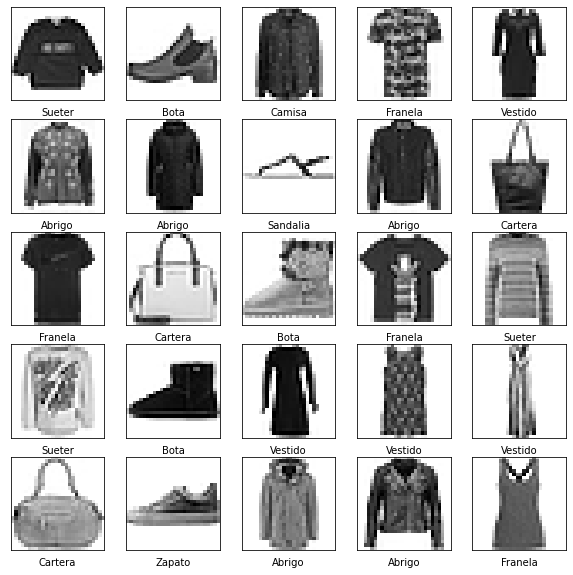

In [63]:
#Diccionario con llaves de la columna labels y valores dados.
ropa = {0: 'Franela', 1: 'Pantalon', 2: 'Sueter', 3: 'Vestido', 4: 'Abrigo', 5: 'Sandalia', 6: 'Camisa', 7: 'Zapato', 8: 'Cartera', 9: 'Bota'}
#Visualizar imagenes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(entrenamiento.iloc[i,1:].values.reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(ropa[entrenamiento.iloc[i,0]])
    
plt.show()

Vemos que cada imagen es del mismo tamaño y todos tienen su label correspondiente con el diccionario 'ropa'

In [64]:
#Separar Datos
X_train = np.array(entrenamiento.iloc[:, 1:])
y_train = np.array(entrenamiento.iloc[:, 0])
X_test = np.array(prueba.iloc[:, 1:])
y_test = np.array(prueba.iloc[:, 0])
#Reshape Datos
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
#Normalizar Datos
X_train = X_train / 255
X_test = X_test / 255
#Categorizar predicciones
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Creación del modelo

In [65]:
#Creamos el modelo
fashion_model = Sequential()


In [66]:
fashion_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)))
fashion_model.add(Activation('relu'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3)))
fashion_model.add(Activation('relu'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
fashion_model.add(Dropout(0.25))
fashion_model.add(Dense(512))
fashion_model.add(Activation('relu'))
fashion_model.add(Dropout(0.5))
fashion_model.add(Dense(10))
fashion_model.add(Activation('softmax'))

# Optimización del modelo

Se decidió por un batch size de 64 y 10 epochs. Veamos que sucede con el valor de tasa de aprendizaje de 0.00001

In [67]:
optimizador = keras.optimizers.Adam(learning_rate=0.00001)
fashion_model.compile(loss='categorical_crossentropy', optimizer=optimizador, metrics=['accuracy'])
history = fashion_model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10
938/938 [==============================] - 31s 32ms/step - loss: 1.6119 - accuracy: 0.4447 - val_loss: 1.0462 - val_accuracy: 0.6541
Epoch 2/10
938/938 [==============================] - 30s 32ms/step - loss: 0.9815 - accuracy: 0.6335 - val_loss: 0.8061 - val_accuracy: 0.7162
Epoch 3/10
938/938 [==============================] - 30s 32ms/step - loss: 0.8307 - accuracy: 0.6948 - val_loss: 0.7084 - val_accuracy: 0.7527
Epoch 4/10
938/938 [==============================] - 30s 32ms/step - loss: 0.7533 - accuracy: 0.7216 - val_loss: 0.6527 - val_accuracy: 0.7585
Epoch 5/10
938/938 [==============================] - 30s 32ms/step - loss: 0.7070 - accuracy: 0.7379 - val_loss: 0.6200 - val_accuracy: 0.7715
Epoch 6/10
938/938 [==============================] - 30s 32ms/step - loss: 0.6693 - accuracy: 0.7513 - val_loss: 0.5918 - val_accuracy: 0.7838
Epoch 7/10
938/938 [==============================] - 30s 32ms/step - loss: 0.6396 - accuracy: 0.7605 - val_loss: 0.5640 - val_accuracy:

In [68]:
#Evaluar Modelo
score = fashion_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.5132772326469421
Test accuracy: 0.8167999982833862


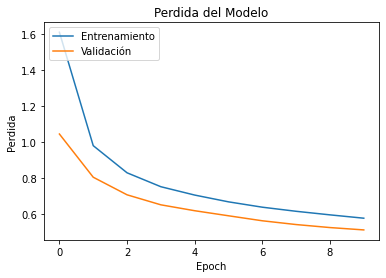

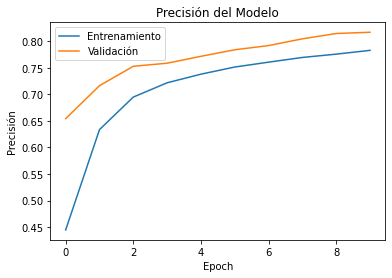

In [69]:
#Gráfica
plot_model(fashion_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
#Perdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida del Modelo')
plt.ylabel('Perdida')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()
#Precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del Modelo')
plt.ylabel('Precisión')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

Observamos que el modelo no fue entrenado de manera correcta. Intentemos actualizar este parametro para observar el cambio


In [70]:
optimizador = keras.optimizers.Adam(learning_rate=0.001)

In [71]:
fashion_model.compile(loss='categorical_crossentropy', optimizer=optimizador, metrics=['accuracy'])
history = fashion_model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test), shuffle=True)


Epoch 1/10
938/938 [==============================] - 32s 34ms/step - loss: 0.4720 - accuracy: 0.8275 - val_loss: 0.3283 - val_accuracy: 0.8810
Epoch 2/10
938/938 [==============================] - 31s 33ms/step - loss: 0.3372 - accuracy: 0.8762 - val_loss: 0.2646 - val_accuracy: 0.9037
Epoch 3/10
938/938 [==============================] - 31s 33ms/step - loss: 0.2932 - accuracy: 0.8922 - val_loss: 0.2461 - val_accuracy: 0.9092
Epoch 4/10
938/938 [==============================] - 31s 34ms/step - loss: 0.2692 - accuracy: 0.9004 - val_loss: 0.2394 - val_accuracy: 0.9108
Epoch 5/10
938/938 [==============================] - 31s 33ms/step - loss: 0.2526 - accuracy: 0.9062 - val_loss: 0.2177 - val_accuracy: 0.9178
Epoch 6/10
938/938 [==============================] - 32s 34ms/step - loss: 0.2376 - accuracy: 0.9121 - val_loss: 0.2209 - val_accuracy: 0.9155
Epoch 7/10
938/938 [==============================] - 32s 34ms/step - loss: 0.2263 - accuracy: 0.9160 - val_loss: 0.2043 - val_accuracy:

In [72]:
#Evaluar Modelo
score = fashion_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.19439414143562317
Test accuracy: 0.9284999966621399


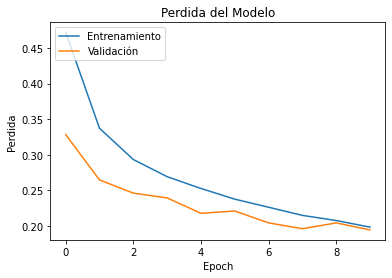

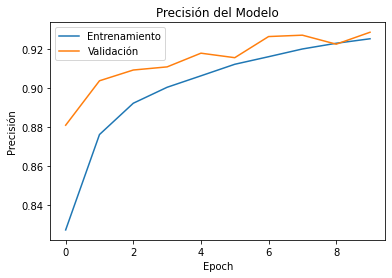

In [73]:
#Gráfica
plot_model(fashion_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
#Perdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida del Modelo')
plt.ylabel('Perdida')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()
#Precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del Modelo')
plt.ylabel('Precisión')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

Nos produce un resultado con un bias mucho menor y unas predicciones más precisas. Veamos el set de validaciones

# Predicciones del modelo

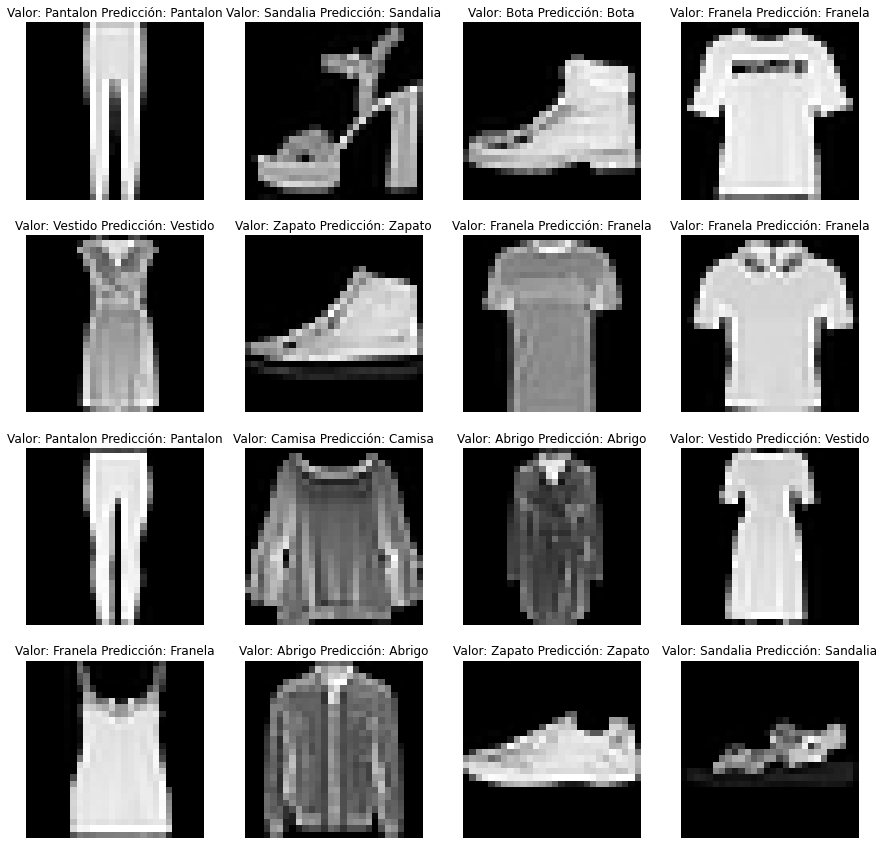

In [74]:
#Predecir ropa
predictions = fashion_model.predict(X_test)
#Visualizar imagenes
plt.figure(figsize=[15,15])
# Seleccionar al azar
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[idx].squeeze(), cmap='gray')
    #Nombrarles su valor asignado y la predicción del modelo
    plt.title("Valor: %s Predicción: %s" % (ropa[np.argmax(y_test[idx])], ropa[np.argmax(predictions[idx])]))
    plt.axis('off')
plt.show()

Vemos que el modelo acierta en una mayoría de los casos. Intenta correr la celda anterior varias veces para observar otros intentos con otras imagenes.